In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [69]:
sys = [0, 1, 2, 3, 4]
symb = ['a', 'b', 'c', 'd', 'e']
name = ['WT', '30N', '30N+90M', '30N+71V', '30N+88D']
key = {'hb': 0, 'vdw': 1, 'ss': 2, 'ion': 3, 'pp': 4, 'pc': 5, 'iac': 6}

nsample = 200
seq = np.zeros((nsample * len(sys), 320000))

for s in range(len(sys)):
    dat = [line.split()[1:] for line in open(f'dat/{symb[sys[s]]}_rin.sequence', 'r').readlines()]    
    for m in range(nsample):
        for n in range(len(dat[m]) // 3):
            k = key[dat[m][n * 3]]
            i = int(dat[m][n * 3 + 1])
            j = int(dat[m][n * 3 + 2])
            seq[s * nsample + m][k * nsample * nsample + i * nsample + j] = 1

In [70]:
data = TSNE(n_components = 2, random_state = 1, perplexity = 50).fit_transform(seq)

In [71]:
xy = []
for s in range(len(sys)):
    xy.append(data[s * nsample : (s + 1) * nsample - 1].T)

In [72]:
len(xy)

5

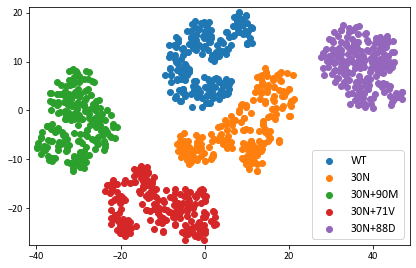

In [73]:
fig, ax = plt.subplots()

for s in range(len(sys)):
    x, y = xy[s]
    ax.scatter(x, y, label = name[sys[s]])
plt.legend()